# Character Animations
This is a bonus. Let's try to animate these characters.

In [ ]:
import settings
from model import Story

story = Story.load_from_directory(settings.STORY_DIR + "/step_4")

# Generate list of scene images

Let's stick the characters into a scene so that we can have lots of context.

In [2]:
character_scene_images = {}
scene_descriptions = {}
character_descriptions = {}

In [3]:
from PIL import Image
import settings

def place_character_in_scene(image: Image, background: Image=None):

    width = settings.CHARACTER_ANIMATION_WIDTH
    height = settings.CHARACTER_ANIMATION_HEIGHT

    # Create a transparent background
    resize_image = Image.new('RGBA', (width, height), (0, 0, 0, 0))


    if background:
        print("Adding background")
        # Add background to the image
        scene = background.convert("RGBA")

        # Scale the scene to fit the normal dimensions while preserving aspect ratio
        scene_ratio = max(width / scene.width, height / scene.height)
        new_scene_size = (int(scene.width * scene_ratio), int(scene.height * scene_ratio))
        scene = scene.resize(new_scene_size)
        
        # Calculate the position to paste the scene image onto the background
        scene_offset = ((width - new_scene_size[0]) // 2, (height - new_scene_size[1]))
        
        # Paste the scene image onto the background
        resize_image.paste(scene, scene_offset, scene)
        print("Added background")


    # Calculate the position to paste the source image onto the background
    src_width, src_height = image.size
    offset = ((width - src_width) // 2, (height - src_height))
    # offset = ((width - src_width) // 2, (height - src_height) // 2)

    # Ensure the image has an alpha channel
    image = image.convert("RGBA")
    
    # Paste the source image onto the background
    resize_image.paste(image, offset, image)

    # Convert the image to RGB
    resize_image = resize_image.convert("RGB")

    return resize_image

Adding background
Added background
Created directory: stories/my_story/step_7/characters


"Meera 'Midnight' Singh"

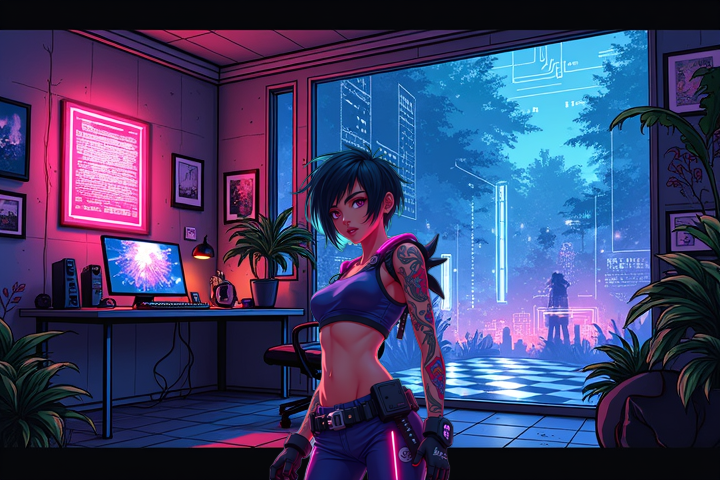

Adding background
Added background
Created directory: stories/my_story/step_7/characters


"Jax 'Specter' Lee"

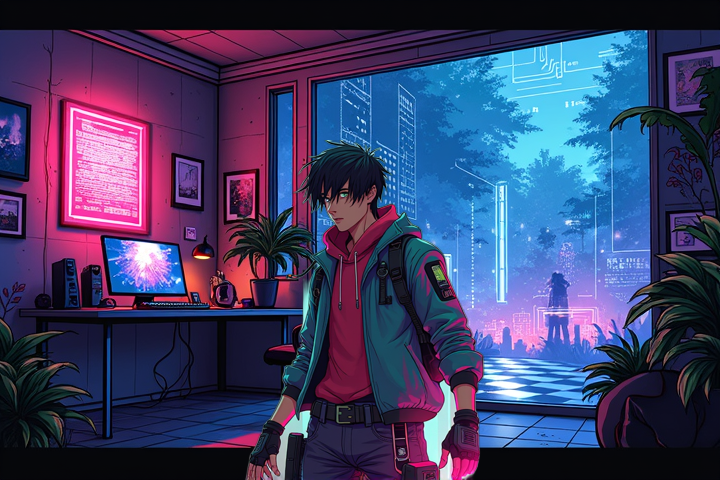

Adding background
Added background
Created directory: stories/my_story/step_7/characters


"Dr. Zhang 'Zee' Wei"

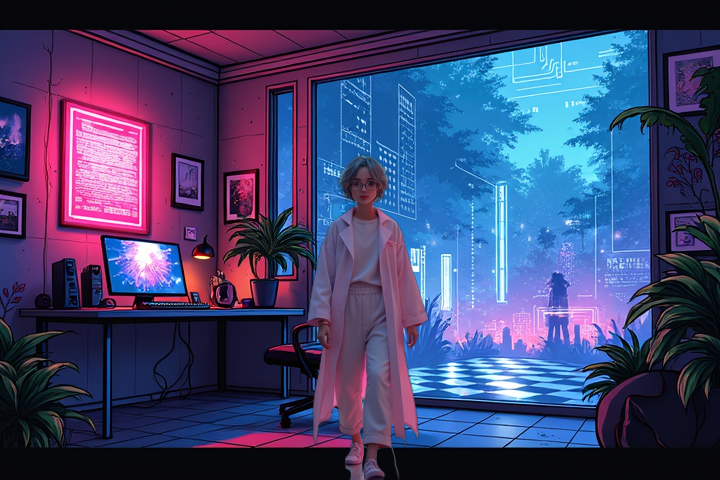

Adding background
Added background
Created directory: stories/my_story/step_7/characters


"Maya 'Rampart' Patel"

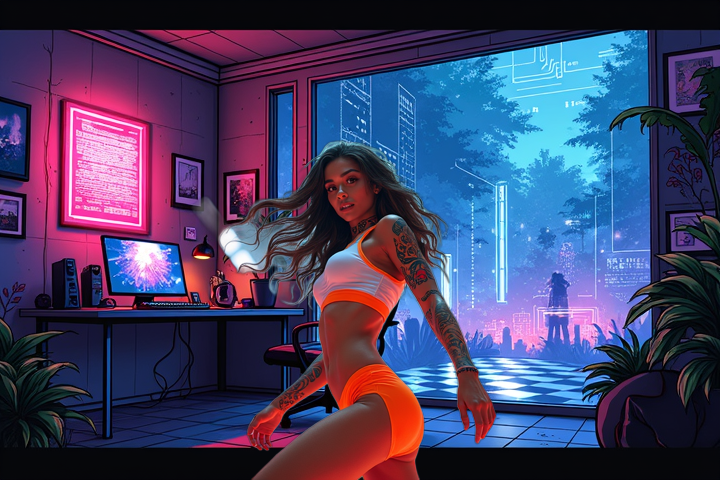

Adding background
Added background
Created directory: stories/my_story/step_7/characters


'The Architect'

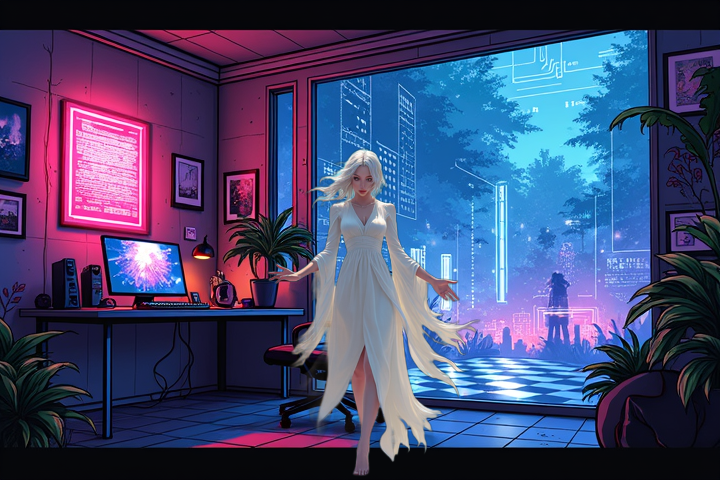

Adding background
Added background
Created directory: stories/my_story/step_7/characters


'Nova Snow'

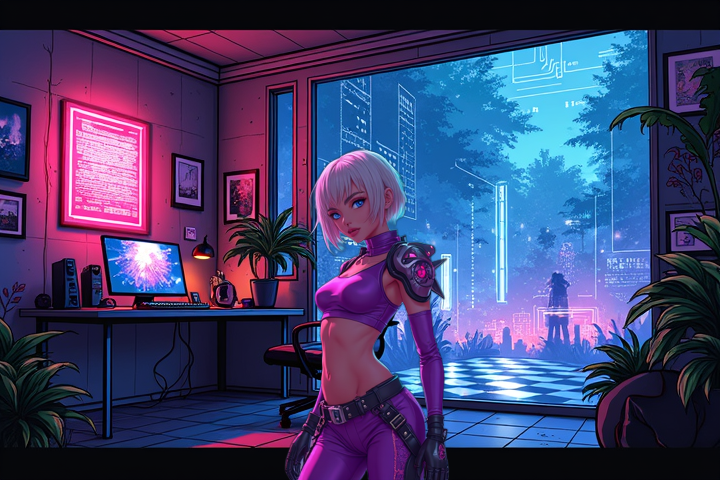

Adding background
Added background
Created directory: stories/my_story/step_7/characters


'Umbra Blackwood'

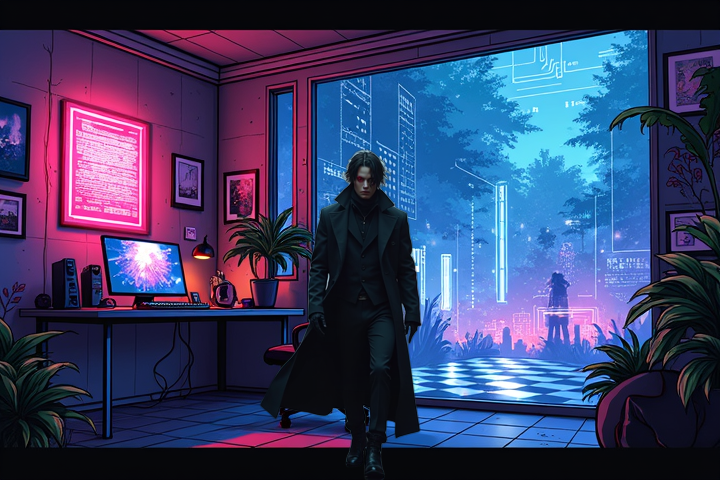

Adding background
Added background
Created directory: stories/my_story/step_7/characters


'Echo Flux'

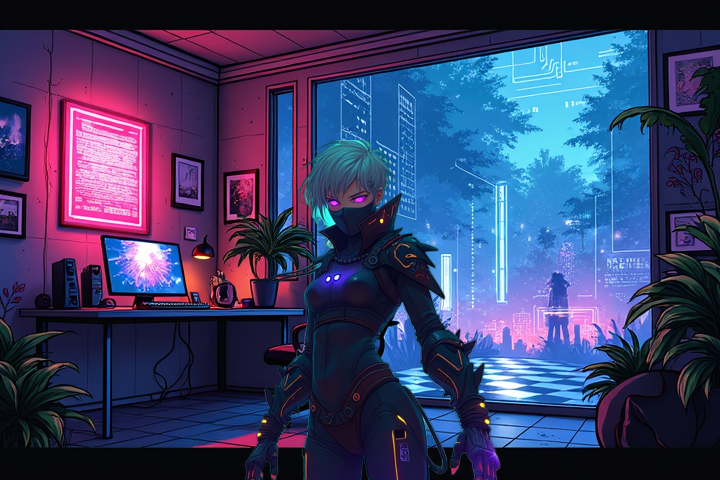

In [4]:
# TEMPORARY: Skip for now since we already ran it
    
from IPython.display import display, Markdown
from IPython.display import Image as IPImage
import rembg
from diffusers.utils import export_to_gif
import os

scene = story.acts[0].scenes[0]


for character in story.characters:
    src_image_path = f"{settings.STORY_DIR}/step_5/characters/{character.name}.png"
    src_image = Image.open(src_image_path)
    src_image = src_image.resize((src_image.size[0]//3*2, src_image.size[1]//3*2))
    src_image = src_image.convert("RGBA")
    src_image = rembg.remove(src_image)

    background = Image.open(f"stories/my_story/step_6/scenes/{scene.title}.png")

    scene_image = place_character_in_scene(src_image, background=background)
    character_scene_images[character.name] = scene_image

    dst_image_path = f"{settings.STORY_DIR}/step_7/characters/{character.name}_scene.png"
    dir_name = os.path.dirname(dst_image_path)
    os.makedirs(dir_name, exist_ok=True)
    print(f"Created directory: {dir_name}")
    scene_image.save(dst_image_path)

    display(character.name)
    display(scene_image)


# Generate list of animation descriptions
We will use vision to look at the character and scene. Then generate a description of the animation from that.

In [5]:
from model import Story, Character

few_shot_examples = [
    Story(
        prompt="In a secret animal society hidden within a dense forest, animal agents solve crimes and protect their home from external threats.",
        plot_overview="In the bustling undergrowth of Shadowbark Forest, Agent Sly and his team of animal detectives tackle cases ranging from stolen food supplies to hidden intruders. With quick wits, unique skills, and high-tech gadgets, the team works together to keep the peace in their hidden society.",
        title="Agents of Shadowbark",
        genre="Adventure",
        medium="Animated Series",
        visual_style="Cartoonish Animal Adventure",
        time_period="Modern Day",
        location="Dense Forest",
        characters=[
            Character(
                name="Agent Sly",
                role="Fox Detective",
                description="A sly, clever fox who always finds the truth.",
                personality="Smart, quick-thinking, and confident.",
                physical_appearance="Slim build, with reddish-brown fur, white chest, and sharp amber eyes. Wears a small detective's hat and a dark scarf.",
                gender="Male",
                race="Fox",
                age="10 (in fox years)",
                catch_phrase="Case closed!",
                voice_description="Sly and smooth, with a hint of mischief.",
                internal_conflict="Fears failing to protect the forest and his team.",
                animation_description="A slim, reddish-brown male fox with a white chest stands with a confident posture, mouth moving fluidly as he speaks. His sharp amber eyes glance around, accentuating key phrases with sly blinks and a slight head tilt. One paw gestures as he speaks, occasionally flicking his bushy tail to emphasize his words. His small detective's hat tilts slightly forward, casting a subtle shadow over his face."
            ),
            Character(
                name="Whiskers",
                role="Tech Expert",
                description="A tech-savvy rabbit who builds gadgets for the team.",
                personality="Nervous, inventive, and intelligent.",
                physical_appearance="Small, with gray fur, long ears, and round glasses over wide, curious eyes. Wears a tool belt with small gadgets.",
                gender="Female",
                race="Rabbit",
                age="7 (in rabbit years)",
                catch_phrase="Just a hop away from solving this!",
                voice_description="Soft-spoken and fast, with a hint of excitement.",
                internal_conflict="Worries about not being brave enough to help directly in the field.",
                animation_description="A small female rabbit with gray fur and long ears stands, speaking in a quick voice. Her round glasses rest over wide, curious eyes that dart nervously, and her nose wiggles with each word. Her ears twitch in reaction to surrounding sounds as she gestures with one paw."
            )
        ]
    ),
    Story(
        prompt="In a magical kingdom, young wizards learn to control their powers in an academy hidden in the clouds.",
        plot_overview="In Skyhaven Academy, students study under master wizards to hone their magical abilities. When Ryn discovers he has a rare power, he must learn to control it before it consumes him, all while facing tests, rivalries, and ancient forces.",
        title="Skyhaven Chronicles",
        genre="Fantasy",
        medium="Book",
        visual_style="Bright and Mystical",
        time_period="Timeless",
        location="Floating Academy in the Clouds",
        characters=[
            Character(
                name="Ryn",
                role="Student Wizard",
                description="A curious and talented student with a hidden power.",
                personality="Brave, curious, and determined.",
                physical_appearance="Slender build, with messy brown hair, olive skin, and bright green eyes. Wears a blue robe with silver embroidery.",
                gender="Male",
                race="Human",
                age="14",
                catch_phrase="I'll master this, no matter what!",
                voice_description="Confident and earnest, with a slight tremor when he's excited.",
                internal_conflict="Fears he may lose control of his powers and harm those around him.",
                animation_description="A slender human male with messy brown hair and olive skin stands with hands outstretched, fingers curling as green energy crackles between them. His bright green eyes widen with intensity, his mouth moving. His blue robe flutters gently from the pulsing aura surrounding him."
            ),
            Character(
                name="Celeste",
                role="Mystical Mentor",
                description="A wise and powerful teacher with control over light magic.",
                personality="Calm, insightful, and protective.",
                physical_appearance="Tall, with long silver hair, fair skin, and pale blue eyes. Wears a flowing white robe that seems to glow.",
                gender="Female",
                race="Elf",
                age="Hundreds of years",
                catch_phrase="Light will always guide you.",
                voice_description="Soft and calming, with a mystical echo.",
                internal_conflict="Struggles with a dark past and the temptation of forbidden magic.",
                animation_description="A tall female elf with long silver hair and fair skin stands with a serene expression, pale blue eyes half-closed as she speaks in a calm, soothing tone. Her flowing white robe shimmers softly, catching ethereal light as beams of soft, golden light radiate from her fingertips in rhythm with her words. Her head tilts gently, and her hair cascades smoothly over her shoulder. "
            )
        ]
    ),
    Story(
        prompt="In a vibrant town, three friends uncover magical trinkets that give them superpowers, which they use to protect the town from mysterious creatures.",
        plot_overview="When Nia, Leo, and Zoe discover ancient amulets in an old shop, they gain superhuman abilities that help them defend their town from dark creatures appearing at night. Together, they navigate newfound powers, teamwork, and the responsibility of their roles.",
        title="The Amulet Keepers",
        genre="Superhero Fantasy",
        medium="Animated Series",
        visual_style="Bright and Action-Packed",
        time_period="Present Day",
        location="Modern Small Town",
        characters=[
            Character(
                name="Nia",
                role="Team Leader with Super Strength",
                description="A courageous friend with newfound super strength.",
                personality="Bold, protective, and strategic.",
                physical_appearance="Athletic build, with short black hair, brown skin, and brown eyes. Wears a colorful red hoodie and jeans.",
                gender="Female",
                race="Human",
                age="13",
                catch_phrase="I've got this!",
                voice_description="Strong and assertive, with a confident tone.",
                internal_conflict="Wonders if she can lead her friends responsibly.",
                animation_description="An athletic young human female with short black hair and brown skin stands with her fists clenched, emphasizing each word with assertive gestures. Her brown eyes are steady, and her red hoodie ripples as she speaks with determination. The ground tremors slightly, showcasing her super strength."
            ),
            Character(
                name="Leo",
                role="Tech Genius with Super Speed",
                description="A tech-savvy friend whose amulet grants him super speed.",
                personality="Energetic, witty, and inventive.",
                physical_appearance="Lean, with messy blond hair, fair skin, and bright blue eyes. Wears a yellow jacket and sneakers.",
                gender="Male",
                race="Human",
                age="13",
                catch_phrase="Blink, and you'll miss me!",
                voice_description="Quick and upbeat, with a hint of mischief.",
                internal_conflict="Fears he might be reckless and endanger his friends.",
                animation_description="A lean human male with messy blond hair and fair skin stands, one leg forward, arms stretched out, speaking in a quick, lively tone. His bright blue eyes shine with excitement, and his mouth moves rapidly in sync with his words. Small bursts of yellow light trail behind him as he gestures animatedly."
            )
        ]
    ),
    Story(
        prompt="In a kingdom divided by elemental forces, two warriors from opposing factions must join forces to defeat a greater evil threatening their land.",
        plot_overview="When a darkness rises that threatens both Fire and Ice Kingdoms, Ember, a fierce fire warrior, and Frost, a disciplined ice mage, must put aside their differences to save the realm. Together, they face battles, uncover ancient secrets, and learn the strength of unity.",
        title="Elemental Alliance",
        genre="Fantasy Adventure",
        medium="Video Game",
        visual_style="Epic and Elemental",
        time_period="Medieval Fantasy",
        location="Fire and Ice Kingdoms",
        characters=[
            Character(
                name="Ember",
                role="Warrior of Fire",
                description="A passionate fighter wielding the power of fire.",
                personality="Fiery, brave, and impulsive.",
                physical_appearance="Athletic, with long, fiery red hair, tan skin, and intense golden eyes. Wears light armor with flame designs.",
                gender="Female",
                race="Human",
                age="22",
                catch_phrase="Feel the heat!",
                voice_description="Bold and intense, like a crackling flame.",
                internal_conflict="Struggles to control her emotions in battle.",
                animation_description="An athletic female human with long, fiery red hair and tan skin stands with one fist clenched as she speaks with fierce passion. Her golden eyes flash with intensity, and flames flicker around her fingertips in time with her words. Her light armor with flame designs catches the light from her fiery aura, and her hair seems to sway like fire, adding to her intense and bold personality."
            ),
            Character(
                name="Frost",
                role="Mage of Ice",
                description="A calm and disciplined mage who controls ice and frost.",
                personality="Calm, wise, and resilient.",
                physical_appearance="Tall and slender, with silvery white hair, pale blue skin, and piercing icy blue eyes. Wears robes adorned with ice patterns.",
                gender="Male",
                race="Human",
                age="24",
                catch_phrase="Embrace the chill.",
                voice_description="Calm and resonant, with a cool tone.",
                internal_conflict="Struggles with emotions he keeps buried beneath his icy exterior.",
                animation_description="A tall, slender human male with silvery white hair and pale blue skin speaks in a calm, resonant tone, his icy blue eyes focused ahead. His robes billow gently as he extends one arm forward, fingers splayed. Icy mist trails from his hand, and frost spreads from his feet, forming delicate crystals on the ground."
            )
        ]
    )
]




In [6]:
from model_text import llm, llm_json
from llama_index.core.llms import ChatMessage
from model_text import display_messages
from utils import merge_stories
from IPython.display import display, Markdown

def extract_animations_from_story(story: Story) -> Story:
    system_message = (
        "You are a story animation designer. "
        "Your task is to extract and imagine character animations from the provided story JSON object with a list of characters. "
        "For each character output an animation_description that describes the character's pose, facial expression, and any special effects. "
        "Include gender, race and physical_appearance and other details that would be important to animating a character properly. "
        "Only use props that are in the physical_appearance. "
        "The animations should match character appearance, personality as well as the genre, location, visual_style, time_period and tone of the story. "
        "Include the movement of any hair, clothing, accessories, or other physical features. "
        "Include eye, hand, leg, and mouth movements to convey emotions. "
        "If there are any lighting considerations like things glowing, describe the color and brightness."
        "The character should not be walking around the scene, but rather pose for the camera. "
        "The character is introucing themselves to the audience and we want to show their personality. "
        "The character is speaking to the audience so be sure to include mouth, head, and eye movements and any other relevant details. "
        "Be sure to have the character show off their unique abilities or traits in the animation_description, "
        "like a punch or energy blast or lasers or a jump as long as it fits their persona. "
        "Only describe physical actions and movements, not internal thoughts or feelings. "
        "**Do not describe sound or smell or other senses other than visual.** "
        "Respond with a JSON object that contains a list of characters with animation_description populated. "
        "Respond with only a valid JSON object and do not include any other information."
    )

    messages = [ChatMessage(role="system", content=system_message)]

    for example in few_shot_examples:
        include = {
            "characters": {
                "__all__": {"animation_description"},
            }
        }
        story_input = example.model_dump_json(indent=4, exclude=include)
        expected = example.model_dump_json(indent=4, include=include)
        messages.append(ChatMessage(role="user", content=story_input))
        messages.append(ChatMessage(role="assistant", content=expected))

    # Add the user input (the story prompt)
    messages.append(ChatMessage(role="user", content=story.short_context()))

    # display_messages(messages)

    # Call the LLM to generate the characters
    response = llm_json.chat(messages, max_new_tokens=1000).message.content

    # Often LLMs will have a double line break between the generated text and the thought process
    updated_story = Story.model_validate_json(response)

    return updated_story


# Quick test
display(Markdown(f"### Quick Character Animation Extraction tests:"))
example_story = Story(
    prompt="In a futuristic galaxy, a team of alien explorers is tasked with investigating strange signals from an uncharted planet. As they uncover secrets, they realize they are not alone.",
    plot_overview="The crew of the starship *Voyager-12* is sent to explore a mysterious planet emitting unusual energy signals. Led by Commander Zeek, a skilled but cautious navigator, the team faces bizarre landscapes, unknown alien lifeforms, and strange anomalies that seem to defy physics. As they delve deeper, they uncover a long-lost alien civilization and a powerful artifact that could either save or destroy their galaxy. Each crew member must confront their fears and work together to unlock the planet's secrets and make it back to the starship.",
    title="The Lost Planet",
    genre="Sci-Fi Adventure",
    medium="Graphic Novel",
    visual_style="Futuristic and Extraterrestrial",
    time_period="Distant Future",
    location="Uncharted Alien Planet",
    characters=[
        Character(
            name="Commander Zeek",
            role="Alien Navigator and Team Leader",
            description="A calm and tactical leader known for quick decisions under pressure.",
            personality="Cautious, intelligent, and level-headed.",
            physical_appearance="Tall and slender, with blue skin, three bright yellow eyes, and two small antennae. Wears a sleek silver spacesuit with a glowing insignia on the chest.",
            gender="Non-binary",
            race="Xenobian",
            age="35 (in Xenobian years)",
            catch_phrase="Stay alert. This place has secrets.",
            voice_description="Low and calm, with a slight metallic echo.",
            internal_conflict="Struggles with the fear of leading the team into unknown danger, feeling the weight of their responsibility.",
        ),
        Character(
            name="Lixx",
            role="Tech Specialist",
            description="A quirky tech expert who can hack into any system with ease.",
            personality="Eccentric, curious, and a bit scatterbrained.",
            physical_appearance="Short and round, with green, scaly skin, four arms, and large, translucent eyes that reflect computer code. Wears a utility belt full of gadgets and a headset.",
            gender="Male",
            race="Zilaxian",
            age="50 (in Zilaxian years)",
            catch_phrase="Just one more adjustment… almost there!",
            voice_description="Fast-talking and slightly high-pitched, with an excited tone.",
            internal_conflict="Overthinks situations, leading to nervousness about making mistakes in critical moments.",
        ),
        Character(
            name="Vara",
            role="Alien Scientist",
            description="A scientist fascinated by alien biology and eager to catalog new life forms.",
            personality="Analytical, curious, and brave.",
            physical_appearance="Tall, with smooth, lavender skin, four small eyes arranged in a diamond shape, and delicate webbed hands. Wears a lab coat over a fitted spacesuit with glowing pockets.",
            gender="Female",
            race="Sylvani",
            age="28 (in Sylvani years)",
            catch_phrase="This is incredible! I've never seen anything like it.",
            voice_description="Gentle and enthusiastic, with a breathy quality.",
            internal_conflict="Feels a deep need to protect and preserve life, even if it conflicts with the mission's safety.",
        ),
        Character(
            name="Rex",
            role="Security Officer",
            description="A tough, no-nonsense officer with a powerful exoskeleton and defensive instincts.",
            personality="Protective, direct, and slightly impatient.",
            physical_appearance="Broad and sturdy, with dark gray skin, large clawed hands, and a bio-mechanical exoskeleton that enhances strength. His face has a single, narrow eye visor that glows red.",
            gender="Male",
            race="Braxian",
            age="40 (in Braxian years)",
            catch_phrase="Stay close. I don't like surprises.",
            voice_description="Deep and gravelly, with a serious tone.",
            internal_conflict="Feels a need to shield the crew from all harm, leading to an overprotective nature that sometimes stifles exploration.",
        )
    ]
)


example_story_with_animations = extract_animations_from_story(example_story)
example_story = merge_stories(example_story, example_story_with_animations)
# example_story.display()
example_story_with_animations.display()

### Quick Character Animation Extraction tests:

AttributeError: 'Story' object has no attribute 'short_context'

## Update the animation_description for our characters

In [ ]:
animations = extract_animations_from_story(story)
# animations.display()
story_with_animations = merge_stories(story, animations)
story_with_animations.save_to_directory(settings.STORY_DIR + "/step_7")
# story_with_animations.display()

## Analyze the scene backdrop
Let's get details we need to animate the background.

In [ ]:
import settings
from model import Story

story = Story.load_from_directory(settings.STORY_DIR + "/step_7")

character_scene_images = {}
scene_descriptions = {}
character_descriptions = {}

In [ ]:
# import model_vision
# from PIL import Image
# background = Image.open("stories/my_story/step_6/scenes/Scene 2: Establishing the Stakes.png")

# prompt = (
#     "Analyze the image in detail to describe all dynamic lighting effects, such as shadows, reflections, glares, or light gradients. "
#     "Describe how light interacts with various surfaces, like soft or sharp shadows, diffused lighting, or reflections on glass or water. "
#     "Identify any atmospheric effects, such as fog, dust, mist, smoke, or rain, and note their density, movement, and influence on lighting. "
#     "Examine and describe any signs of motion in the scene, including wind effects on grass, leaves, or trees; water ripples or waves; or any other environmental effects suggesting movement. "
#     "If relevant, describe the time of day or weather conditions and how they affect the scene's mood and color palette. "
# )

# scene_description = model_vision.vision_prompt(background, prompt)

# display(Markdown(f"### Scene Description:"))
# display(Markdown(f"{scene_description}"))
# display(background)


In [ ]:
# import model_vision
# from IPython.display import display, Markdown
# from PIL import Image


# for character in story.characters:
#     display(Markdown(f"""
                     
# ---
                    
# ## {character.name}

# **Role**: {character.role}
                    
# **Physical Apperaance**: {character.physical_appearance}

# **Description**: {character.description}

# **Personality**: {character.personality}

# ### Prompt
# {prompt}

#     """))

#     # print("Opening image...")
#     src_image_path = f"{settings.STORY_DIR}/step_7/characters/{character.name}_scene.png"
#     src_image = Image.open(src_image_path)
#     character_scene_images[character.name] = src_image

#     print("Generating response...")
#     llm_response = model_vision.vision_prompt(src_image, prompt)
#     character_scene_descriptions[character.name] = llm_response
#     formatted_response = "\n".join([f"> {line}" for line in llm_response.split("\n")])
#     display(Markdown(f"""
# ## Response
# {formatted_response}
#     """))   

#     display(src_image)

#     # prompt = ("You are an animator. You must extract details from the animation and describe what motions are happening in the single moment depicted. "
#     #           "The character is talking. "
#     #           "Your description will be short and one paragraph long or less. "
#     #           "You must **MENTION THAT THE CHARACTER IS SPEAKING** to the audience. "
#     #           "Mention that the camera is rotating around the character slowly. "
#     #           "The character moves, but doesn't walk. "
#     #           "Describe the movement of each body part including arms and legs and any clothing or accessories or hair. "
#     #           # "If the image seems static, be creative and come up with a dynamic action, such as lighting or camera zooming and arcing. "
#     #           "Make this an epic brief moment animation. "
#     #           # "Make the camera move. Make the character move a bit, just not walking around. "
#     #           "Gravity is on. "
#     #         #   "Make some wind. "
#     #           "Call out any shadows. "
#     #           "If there is hair or other objects that can flow, express their movement. Do not mention hair or any other body part if they are not present in the picture. "
#     #         #   "This is the first frame of an animation and you need to output details for the remaining frames. "
#     #           "Describe the motions of the character and camera. "
#     #           "Describe head and body movements as they speak. "
#     #           "Describe light sources and whether they are dynamic, e.g. flickering lights. "
#     #           "Describe the atmosphere, e.g. fog, rain, snow, dark. "
#     #           "If there is a visible mouth, mention that it is moving to talk, otherwise if it is covered such as a mask or is missing, do not mention it. "
#     #           "If the character is walking, assume the are stopping or gesturing. They are not moving around in the scene. Mention that they are coming to a stop if they are walking."
#     #           # "Focus on camera movement, scene movement, lighting effects, clothing/accessory/hair animation and character gestures. "
#     #           "Describe only visual effects. Do not describe audio, smells, etc. "
#     #           "Be sure to mention the character's appearance, body language movements and the setting motions. "
#     #           "Focus only on details an animator cares about. "
#     #           "**THE CHARACTER MUST MOVE SOME BODY PARTS WHILE TALKING** "
#     #         #   "Keep the response short, but detailed. "
#     #         #   "Be prescriptive. "
#     #         #   "Describe any details to animate the clothing or surrounding environment. "
#     #           f"The genre of the story is {story.genre} set in a {story.visual_style} visual style in location: {story.location} in time period: {story.time_period}. "
#     #           f"The character is a {character.gender} {character.race} of age {character.age} "
#     #           # "with appearance: \n{character.physical_appearance} \n\n"
#     #           # f"Their personality is: {character.personality}. "
#     # )

#     # Before adding example
#     # The scene opens with the robot ninja standing in a dimly lit corridor, his red eyes glowing ominously. The camera slowly pans to the right, revealing the dilapidated state of the surroundings. The ninja's cloak billows slightly as he speaks to the audience, his voice echoing off the walls. The camera zooms in on his face, highlighting the intricate details of his mask and the glowing blue circuits on his body. The scene is filled with a sense of mystery and danger, as the ninja's piercing red eyes seem to pierce through the darkness. The camera then pans up to reveal the ceiling, where a flickering light casts eerie shadows on the walls. The ninja's body language suggests that he is confident and strategic, as he moves with purpose and determination. The scene ends with the camera slowly zooming out, revealing the full extent of the corridor and the ninja's imposing presence.



# #     prompt += """


# # Here is an example:

# # The character comes to a commanding stop in the dim corridor, their cloak settling around them with a slow, graceful sweep. Their head tilts slightly forward, red eyes glowing intensely beneath the hood as they lock onto the viewer with a piercing gaze. As they begin to speak expressively, their eyes express emotion, their hands move subtly, emphasizing key points while their head shifts with each phrase, intensifying their words. Overhead lights flicker, casting fragmented shadows that ripple across the walls and floor, stretching and shifting around the character's form. The camera slowly rotates around the character, capturing the intensity of their gaze as the shadows deepen. A faint mist swirls around their feet along with some trash, as the metallic sheen of their suit reflects the cold, industrial light, highlighting the sharp contours of their poised figure. 
# # """
# #             #   f"The story is about: {story.plot_overview}.")

# # The character stands still in a dimly lit industrial hallway, his gaze fixed on the audience. His body is poised, suggesting a moment of contemplation or speech. The camera angle is from the side, capturing the full length of his figure as he stands in the center of the frame. The lighting is low, with overhead fluorescent lights casting a soft glow on the wet floor, reflecting off the metallic surfaces and creating a moody atmosphere. The character's cloak and mask are the only elements that break the uniformity of the scene, adding a touch of mystery. His posture is upright, and his hands are clasped in front of him, indicating a moment of pause or emphasis in his speech. The environment around him is cluttered with industrial equipment, including pipes, valves, and machinery, which adds to the gritty, cyberpunk aesthetic of the setting. The character's blue circuits and red eyes are the most striking features, drawing the viewer's attention and hinting at a technologically advanced nature. The overall mood is one of anticipation, as if the character is about to reveal something significant or make a decisive move.

# # The character is standing in a dimly lit corridor with a futuristic, industrial feel. She is facing the camera with a confident stance, her body slightly turned to the side. Her hands are casually placed on her hips, and her gaze is direct and intense. The lighting in the scene is primarily from overhead fluorescent lights, casting a soft glow on the wet, reflective floor and the metallic walls. The atmosphere is moody and atmospheric, with a sense of mystery and danger. The character's clothing and accessories are detailed and realistic, with the leather jacket and high-tech rifle adding to the cyberpunk aesthetic. The character's hair is styled in a short, spiky manner, and her bright green eyes are a striking feature. The scene is set in a dystopian future, with the character's appearance and attire reflecting the harsh and unforgiving environment of Neo-Tokyo.



# # for character in story.characters:
# #     prompt = (
# #         "Describe the current, in-the-moment scene of a character introducing themselves, focusing on their dynamic, ongoing animations and visible interactions with the environment. "
# #         "Capture the character's movements, expressions, and gestures in a single, active frame where they are mid-speech, conveying a strong sense of personality through body language. "
        
# #         # Character Movements and Gestures
# #         "Show the character's current stance and how their head, gaze, and subtle body movements emphasize their personality—for instance, leaning slightly forward for confidence, or shifting weight casually for a laid-back demeanor. "
# #         "Describe any distinct gesture, like a hand moving to emphasize a point, a confident forward tilt, or a small action that fits their personality (a short punch for a fighter, a subtle backflip for an energetic type, or a relaxed stretch for a laid-back character). "
# #         "Focus on the natural rhythm of speaking, describing lip or jaw movements only if their mouth is visible. Avoid past or future actions, keeping focus on their current expression and posture. "
        
# #         # Real-Time Atmospheric and Lighting Effects
# #         "Describe any atmospheric effects, such as drifting fog, flickering lights, or moving shadows, in relation to the character and the immediate environment. Mention the visible lighting sources and how they interact with the character, casting highlights or shadows that move slightly as the character shifts, giving a subtle sense of depth and motion. "
        
# #         # Continuous Environmental and Costume Animation
# #         "Include how the character's clothing, accessories, or hair move naturally in response to their subtle gestures or any environmental effects, such as a cloak that shifts gently with their posture or metallic accessories catching the light. "
# #         "Describe background elements that respond to the character's presence, such as light reflections on a wet floor, or shadows that shift slightly in sync with their movements, maintaining focus on the character in this single moment. "
        
# #         # Scene Context
# #         f"Within this scene, the genre is {story.genre}, and the visual style is {story.visual_style}, set in {story.location} during {story.time_period}. "
# #         f"The character is a {character.gender}, age {character.age}, with the following physical appearance: {character.physical_appearance}. "
# #         f"Their personality is {character.personality}, which should be evident in their body language and expressions. "
        
# #         # Animator's Focus
# #         "Provide a description with animation-specific details that are present in this single moment, emphasizing visible, active elements without story context or narrative background. Avoid mentioning audio cues or non-visual elements. "
# #     )






## Save animation descriptions

In [ ]:
# for character in story.characters:
#     character.animation_description = character_scene_descriptions[character.name]
    
# story.display()

# story.save_to_directory(settings.STORY_DIR + "/step_7")

# Animate Each Character


In [ ]:
from model import Story
import settings

story = Story.load_from_directory(settings.STORY_DIR + "/step_7")

### Image/Text-to-video

#### CogVideoX-5b-I2V
https://huggingface.co/THUDM/CogVideoX-5b-I2V

#### i2vgen-xl
https://huggingface.co/docs/diffusers/main/en/using-diffusers/text-img2vid#i2vgen-xl


```json
{
    "title": "The Call to Adventure",
    "description": "Gravitas, Tempest, Nova, and Aether each receive a mysterious signal that sets them on a path to unite against an ancient threat.",
    "characters_involved": [
        "Gravitas",
        "Tempest",
        "Nova",
        "Aether"
    ],
    "setting": "Various locations across the universe",
    "time_of_day": "Dawn",
    "location": "Multiple planets and space stations",
    "lighting": "Soft, golden light of dawn",
    "mood": "Hopeful and anticipatory",
    "props": [],
    "key_actions": [
        "Each hero receives a cryptic message that sets them on their journey."
    ],
    "dialogue": [],
    "background_image_prompt": "A vast, starry night sky with various planets and space stations visible in the distance. The atmosphere is filled with a soft, golden light of dawn.",
    "background_animation": "Stars and planets moving in the background, with a subtle glow effect to represent the mysterious signal.",
    "scene_image_prompt": "Epic Comic Book Illustration - Dynamic, High-Contrast Colors and Expressive Line Work. A tall, imposing man with short black hair, piercing brown eyes, and a strong jawline stands heroically in the foreground, looking up at the sky as if receiving a message from an unknown source.",
    "scene_image_prompt_short": "A brooding, serious-looking man with jet-black hair and piercing brown eyes looks up at the sky, set against a backdrop of stars and planets."
}
```

In [ ]:
from IPython.display import display, Markdown
import os
from model_image2video import image_to_video
from PIL import Image

for act in story.acts:
    for scene in act.scenes:
        # TODO: Create animation prompt
        # stories/my_story/step_6/scenes/Scene 1: The Celestial Warning.live.png
        src_image_path = f"{settings.STORY_DIR}/step_6/scenes/{scene.title}.live.png"
        dst_image_path = f"{settings.STORY_DIR}/step_7/scene/{scene.title}.gif"
        dst_video_path = f"{settings.STORY_DIR}/step_7/scene/{scene.title}.mp4"
        dir_name = os.path.dirname(dst_image_path)
        os.makedirs(dir_name, exist_ok=True)
        src_image = Image.open(src_image_path)
        prompt = f"Animated {scene.scene_image_prompt} {scene.background_animation} {scene.lighting}"

        display(Markdown(f"""---
                
## {scene.title}
                    
**Description**: {scene.description}

### Prompt:

> {prompt}

"""))
        negative_prompt = "Distorted mouth, eyes, and body movements. Disconnected limbs."
        image_to_video(prompt=prompt, image=src_image, gif_filename=dst_image_path, video_filename=dst_video_path, display_video=True, negative_prompt=negative_prompt)

In [ ]:
from IPython.display import display, Markdown
from IPython.display import Image as IPImage
import time


scene = story.acts[0].scenes[0]



# prompts = [
#     "Arc around character to the right",
#     "Arch around the character to the left",
# ]



# [6.5, 2, 9, 4, 7.5, 5, 8, 3]
# for guidance_scale in [7.0, 2, 9, 4, 7.5, 5, 8, 3]:
for character in story.characters:
    # display(character.image)

    # prompt = f"Epic arc shot action shot of {character.role} character in an action pose looking awesome ready for anything. Character is talking while standing, looking around and {character.personality}. {character.physical_appearance}."
    # prompt = f"Epic arc shot of {character.role} character in a powerful action stance standing still while camera rotates around subject. Character personality is {character.personality}"
    # prompt = f"Epic arc shot while zooming into close-up of character in a powerful action pose while speaking animatedly. Character is talking to us and expressing themselves. Character personality is {character.personality}"
    # prompt = f"Character is speaking animatedly and gesturing. Epic arc shot while zooming into close-up of character. Character moves naturally while talking in a powerful action pose. Character is talking to us and expressing themselves. Character personality is {character.personality}. Character is: '{character.physical_appearance}'. The scene is: {scene_settings}."
    # prompt = f"Character in an action pose while speaking. Epic arc shot around character. Character personality is {character.personality}. Character is: '{character.physical_appearance}'. The scene is: {scene_settings}."

    # TODO: Can change prompts while creating next sequence
    # prompt = f"Character standing still while talking. Mouth is moving. Solid background. Pointing hand forward."
    # prompt = f"Character speaking in an action pose. Standing still while talking. Mouth is moving. Head moves. The character is: '{character.physical_appearance}'. The secne is: {scene_settings}."
    
    src_image_path = f"{settings.STORY_DIR}/step_7/characters/{character.name}_scene.png"
    src_image = Image.open(src_image_path)
    # character_scene_images[character.name] = src_image

    display(character)

    # src_image = character_scene_images[character.name]
    # prompt = f"An slow epic arc shot of the whole body to the right. {character.animation_description}. {scene.background_animation}"
    prompt = "An slow epic arc shot of the whole body to the right."
    # prompt = f"{character.animation_description}. {scene.background_animation}"
    # prompt = f"An slow epic arc shot to the right while zooming in. Grenades are exploding all around the ninja attacks and dust is flying everywhere. {scene.background_animation}"
    # prompt = f"A ninja swings its laser sword and enemies explode into bits"
    # prompt = f"a {character.gender} {character.race} speaks animatedly, gesturing with their hands. Lasers shoot out of their eyes and an explosion ensues."
    formatted_prompt = "\n".join([f"> {line}" for line in prompt.split("\n")])
    dst_image_path = f"{settings.STORY_DIR}/step_7/characters/{character.name}.gif"
    dst_video_path = f"{settings.STORY_DIR}/step_7/characters/{character.name}.mp4"
    guidance_scale = 7.0
    
    display(Markdown(f"""---
                
## {character.name}

**Role**: {character.role}
                    
**Physical Apperaance**: {character.physical_appearance}

**Description**: {character.description}

**Personality**: {character.personality}

### Prompt:

**guidance_scale**: {guidance_scale}

{formatted_prompt}

"""))



    print('-'*80)
    print(f"Guidance Scale: {guidance_scale}")
    
    # frames = image_to_frames(src_image, prompt=prompt, negative_prompt=negative_prompt, guidance_scale=guidance_scale)
    guidance_scale = float(guidance_scale)

    frames = []
    cuurent_image = src_image

    # Combine 2 inferences together by using the last image for the next prediction
    image_to_video(prompt=prompt, image=src_image, gif_filename=dst_image_path, video_filename=dst_video_path, display_video=True, sequences=2)
